# #1 Прочитать про астроциты, нейроны, tripartite synapse. Написать вкратце, что поняли.

 Нейроны - это основные клетки нервной системы. Они состоят из тела (сомы) и отростков (дендриты и аксоны). Нейроны могут иметь разную форму в зависимости от выполняемой функции и области, куда они входят. 
Дентриты - короткие отростки нерйонов- часто могут многократно ветвится.
Аксон у нейронов один. Он заканчивается терминальным расширением.
Астроциты - вспомогательные клетки нервной системы, относятся к системе глиальных элементов нервной ткани. Выполняют следующие функции. Они служат для опоры и поддержки нейронов, выполняют трофическую функцию. Создают гематоэнцефалический барьер. 
Tripartite synapse — это синапс, состоящий из двух нейронов и астроцита в качестве функциональной единицы.
В tripartite synapse нейротрансмиттеры, высвобождаемые нейронами, также связываются с рецепторами на соседнем процессе астроцита. Это активирует сигнальные пути в астроцитах, которые модулируют синаптическое поведение.

# #2  Анализ


Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import cv2
import pathlib2
from pathlib2 import Path
import pandas as pd

In [3]:
from listofpaths import list_paths
data_path = Path(r'D:\Education\kurs 3\sem 2\Progr\Task Astrocytes')
path_folder = list_paths(data_path)

In [4]:
path_folder

[WindowsPath('D:/Education/kurs 3/sem 2/Progr/Task Astrocytes/2016-05-18_fileNo11_BM3D_z-max'),
 WindowsPath('D:/Education/kurs 3/sem 2/Progr/Task Astrocytes/2016-05-26_fileNo32_BM3D_z-max'),
 WindowsPath('D:/Education/kurs 3/sem 2/Progr/Task Astrocytes/31_08_2020_tser1'),
 WindowsPath('D:/Education/kurs 3/sem 2/Progr/Task Astrocytes/31_08_2020_tser2'),
 WindowsPath('D:/Education/kurs 3/sem 2/Progr/Task Astrocytes/31_08_2020_tser3'),
 WindowsPath('D:/Education/kurs 3/sem 2/Progr/Task Astrocytes/31_08_2020_tser4')]

# Функция, которая по заданному относительному пути ищет картинки png-формата в указанной директории

In [5]:
import findpict

# Функция, которая принимает список путей для каждой из папок до разделения на images и events и создаёт датасет для каждой из папок, который сохраняет в список датасетов. Возвращает список датасетов

In [6]:
from datasety import Datasety

In [7]:
astro_sets = Datasety(path_folder)

In [8]:
astro_sets 

[       image_name                                          file_path  \
 0        event_t1  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 1       event_t10  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 2      event_t100  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 3      event_t101  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 4      event_t102  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 ..            ...                                                ...   
 595  smoothed_t95  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 596  smoothed_t96  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 597  smoothed_t97  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 598  smoothed_t98  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 599  smoothed_t99  D:\Education\kurs 3\sem 2\Progr\Task Astrocyte...   
 
     types_of_video moments         nazvania times  
 0           events      t1  Task Astrocytes     1  
 1           eve

Функция для сортировки датасета по столбцу times

In [9]:
from sortdf import sorted_dataset_by_times

In [10]:
#6.5. двумерная гистограмма: для каждого пикселя количество моментов времени, когда он горел.

from tdih import two_dimensional_illumination_histogram

cho = two_dimensional_illumination_histogram(0, path_folder)
print(cho)


d:\Education\kurs 3\sem 2\Progr\Astro\package\src\sortdf.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['times'] = df['times'].astype(int)


[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [161 161 161]
  [167 167 167]
  [161 161 161]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [174 174 174]
  [175 175 175]
  [171 171 171]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [188 188 188]
  [188 188 188]
  [180 180 180]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [177 177 177]
  [195 195 195]
  [206 206 206]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [151 151 151]
  [180 180 180]
  [194 194 194]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [111 111 111]
  [153 153 153]
  [181 181 181]]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [161 161 161]
  [167 167 167]
  [161 161 161]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [174 174 174]
  [175 175 175]
  [171 171 171]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [188 188 188]
  [188 188 188]
  [180 180 180]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [177 177 177]
  [195 195 195]
  [206 206 206]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [151 151 151]
  [180 180 180]
  [194 194 194]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [111 111 111]
  [153 153 153]
  [181 181 181]]]


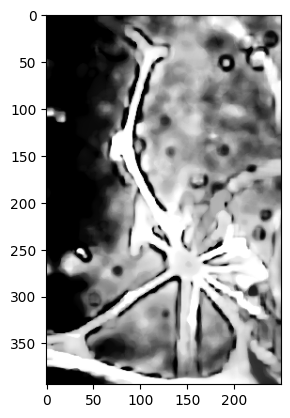

In [11]:
plt.imshow(cho)
print(cho)

d:\Education\kurs 3\sem 2\Progr\Astro\package\src\sortdf.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['times'] = df['times'].astype(int)


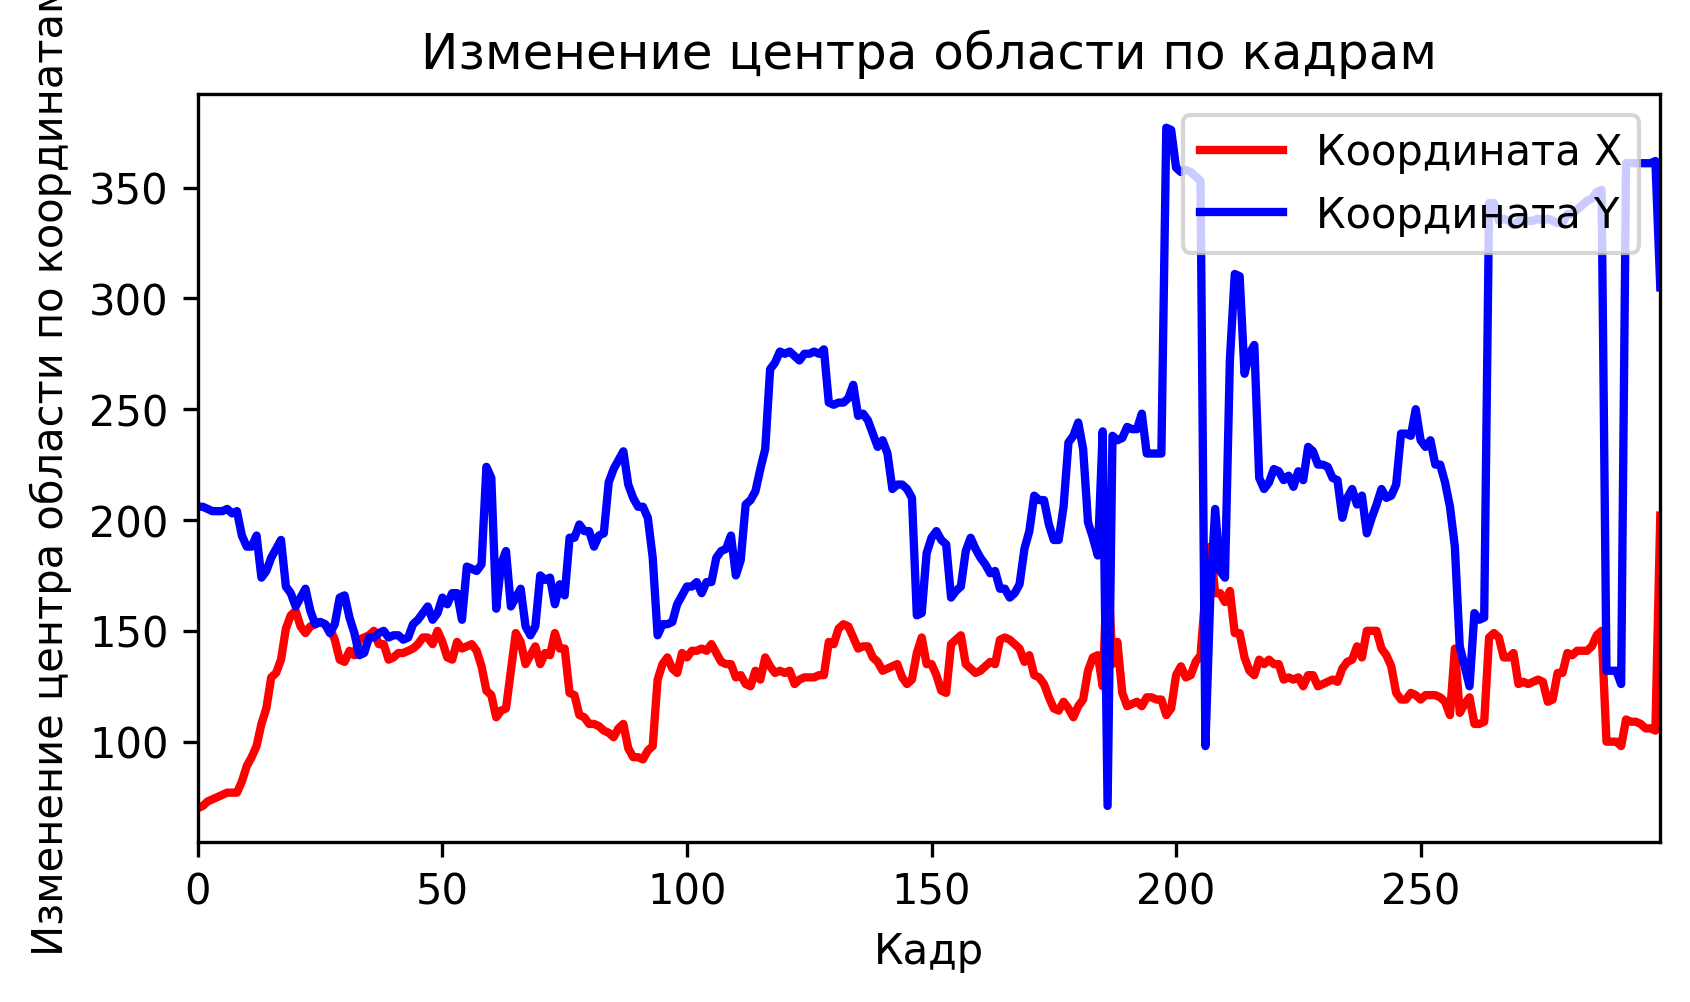

In [14]:
#6.10. координаты центра самой большой области в зависимости от номера кадра

from cla import center_large_area     

coh = center_large_area(0, path_folder) 

In [15]:
#6.11. два числа: координаты среднего вектора смещения центра самой большой области 
#(смещение вычисляется по соседним кадрам, если расстояние между центрами не превышает 10мкм; 
# соседние кадры, на которых нет областей или расстояние между центрами слишком большое – пропускаются).
from adv import average_displacement_vector

In [16]:
hoc = average_displacement_vector(0,path_folder)
print(hoc)

d:\Education\kurs 3\sem 2\Progr\Astro\package\src\sortdf.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['times'] = df['times'].astype(int)


(-7.637254901960785, -13.558823529411764)
